In [1]:
import re
import datetime
from datetime import datetime
import jovian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
import itertools
from collections import Counter
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

## Data Preprocessing

In [2]:
def rawToDf(file, key):
    '''Converts raw .txt file into a Data Frame'''
    
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s'
    }
    datetime_formats = {
        '12hr' : '%d/%m/%y %I:%M %p'
    }
    
    with open(file, 'r', encoding='utf-8') as raw_data:
        # print(raw_data.read())
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("group_notification")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['message'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    
    return df

In [3]:
df = rawToDf("OF.txt","12hr")

In [4]:
df.head(4)

,date_time,user,message
0,"20/07/20, 7:57 pm -",group_notification,Messages and calls are end-to-end encrypted. N...
1,"06/08/15, 10:58 pm -",group_notification,"Nani created group ""Our Family"""
2,"20/07/20, 7:57 pm -",group_notification,Nani added you
3,"20/07/20, 7:57 pm -",group_notification,Nani added Shreya Didi


In [5]:
df.dtypes

date_time    object
user         object
message      object
dtype: object

In [6]:
data = df.drop([0,1,2], axis=0, inplace= True)

In [7]:
df.drop(df.index[df['user'] == 'group_notification'], inplace = True)

In [8]:
df

,date_time,user,message
4,"20/07/20, 8:22 pm -",Seema Masi,<Media omitted>
5,"20/07/20, 8:50 pm -",Shanu Bhaiya,This message was deleted
6,"20/07/20, 9:23 pm -",Papa,This message was deleted
7,"20/07/20, 9:24 pm -",Shanu Bhaiya,Itna support karne ke baad democracy mein itna...
8,"20/07/20, 9:24 pm -",Shanu Bhaiya,🤔
...,...,...,...
9059,"17/08/21, 5:24 pm -",Nana,😀😀
9060,"17/08/21, 6:20 pm -",Nisha Masi,😃😃
9061,"17/08/21, 7:26 pm -",Nani,😃😂
9062,"17/08/21, 10:11 pm -",Seema Masi,आज से *काबुली* चने का नाम तालिबानी चना होगा 😁😁


In [9]:
df.dtypes

date_time    object
user         object
message      object
dtype: object

In [10]:
df.isnull().sum()

date_time    0
user         0
message      0
dtype: int64

In [11]:
df['date_time'] = df['date_time'].str.replace(',', '')

In [12]:
df['date_time'] = df['date_time'].str.replace('-', '')

In [13]:
df

,date_time,user,message
4,20/07/20 8:22 pm,Seema Masi,<Media omitted>
5,20/07/20 8:50 pm,Shanu Bhaiya,This message was deleted
6,20/07/20 9:23 pm,Papa,This message was deleted
7,20/07/20 9:24 pm,Shanu Bhaiya,Itna support karne ke baad democracy mein itna...
8,20/07/20 9:24 pm,Shanu Bhaiya,🤔
...,...,...,...
9059,17/08/21 5:24 pm,Nana,😀😀
9060,17/08/21 6:20 pm,Nisha Masi,😃😃
9061,17/08/21 7:26 pm,Nani,😃😂
9062,17/08/21 10:11 pm,Seema Masi,आज से *काबुली* चने का नाम तालिबानी चना होगा 😁😁


In [14]:
df['date_time']=pd.to_datetime(df['date_time'], dayfirst=True)

In [15]:
df['date'] = pd.to_datetime(df['date_time']).dt.date

In [16]:
df

,date_time,user,message,date
4,2020-07-20 20:22:00,Seema Masi,<Media omitted>,2020-07-20
5,2020-07-20 20:50:00,Shanu Bhaiya,This message was deleted,2020-07-20
6,2020-07-20 21:23:00,Papa,This message was deleted,2020-07-20
7,2020-07-20 21:24:00,Shanu Bhaiya,Itna support karne ke baad democracy mein itna...,2020-07-20
8,2020-07-20 21:24:00,Shanu Bhaiya,🤔,2020-07-20
...,...,...,...,...
9059,2021-08-17 17:24:00,Nana,😀😀,2021-08-17
9060,2021-08-17 18:20:00,Nisha Masi,😃😃,2021-08-17
9061,2021-08-17 19:26:00,Nani,😃😂,2021-08-17
9062,2021-08-17 22:11:00,Seema Masi,आज से *काबुली* चने का नाम तालिबानी चना होगा 😁😁,2021-08-17


In [17]:
df.dtypes

date_time    datetime64[ns]
user                 object
message              object
date                 object
dtype: object

In [18]:
df.head(2)

,date_time,user,message,date
4,2020-07-20 20:22:00,Seema Masi,<Media omitted>,2020-07-20
5,2020-07-20 20:50:00,Shanu Bhaiya,This message was deleted,2020-07-20


In [19]:
df['Year'] = df['date_time'].dt.year
df['Day'] = df['date_time'].dt.day
df['Month'] = df['date_time'].dt.month
df['Time']=df['date_time'].dt.time
df['Weekday']=df['date_time'].dt.day_name()
df['Month Name']=df['date_time'].dt.month_name()

In [20]:
def hr_func(ts):
    return ts.hour
df['hour'] = df['Time'].apply(hr_func)

In [21]:
df.head(2)

,date_time,user,message,date,Year,Day,Month,Time,Weekday,Month Name,hour
4,2020-07-20 20:22:00,Seema Masi,<Media omitted>,2020-07-20,2020,20,7,20:22:00,Monday,July,20
5,2020-07-20 20:50:00,Shanu Bhaiya,This message was deleted,2020-07-20,2020,20,7,20:50:00,Monday,July,20


In [22]:
def hr_func(ts):
    return ts.hour
df['hour'] = df['Time'].apply(hr_func)

In [23]:
df.head(2)

,date_time,user,message,date,Year,Day,Month,Time,Weekday,Month Name,hour
4,2020-07-20 20:22:00,Seema Masi,<Media omitted>,2020-07-20,2020,20,7,20:22:00,Monday,July,20
5,2020-07-20 20:50:00,Shanu Bhaiya,This message was deleted,2020-07-20,2020,20,7,20:50:00,Monday,July,20


## 1. Most Talkative User

<AxesSubplot:title={'center':'Data on User Activity'}, xlabel='Message frequency', ylabel='user'>

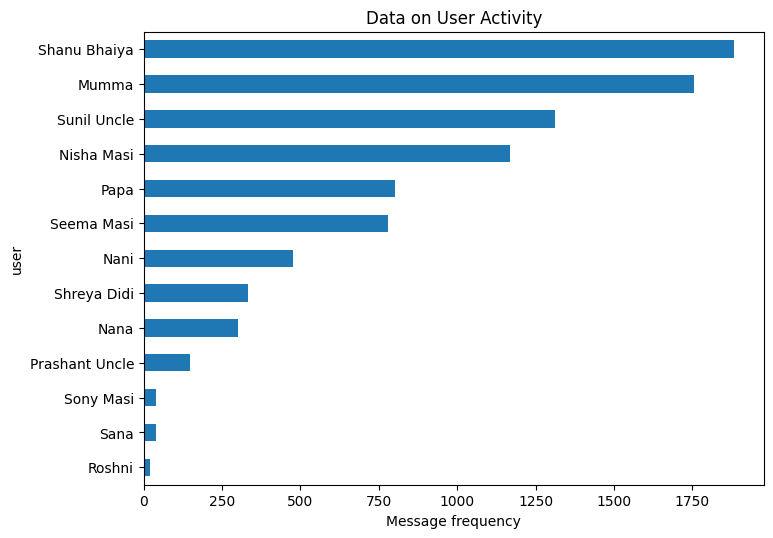

In [24]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.xlabel("Message frequency")
plt.title("Data on User Activity")
df.groupby("user")["message"].count().sort_values().tail(20).plot(kind="barh")


In [25]:
df["user"].value_counts()

Shanu Bhaiya      1884
Mumma             1754
Sunil Uncle       1312
Nisha Masi        1168
Papa               803
Seema Masi         779
Nani               477
Shreya Didi        334
Nana               302
Prashant Uncle     149
Sony Masi           39
Sana                38
Roshni              19
Name: user, dtype: int64

## 2. Activity & Overall Frequency of Messages

In [26]:
df.head(2)

,date_time,user,message,date,Year,Day,Month,Time,Weekday,Month Name,hour
4,2020-07-20 20:22:00,Seema Masi,<Media omitted>,2020-07-20,2020,20,7,20:22:00,Monday,July,20
5,2020-07-20 20:50:00,Shanu Bhaiya,This message was deleted,2020-07-20,2020,20,7,20:50:00,Monday,July,20


<AxesSubplot:ylabel='hour'>

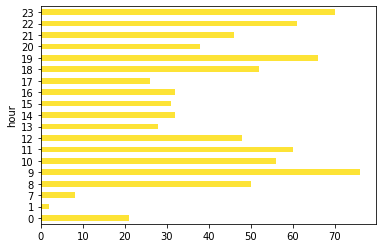

In [27]:
df[df['user']=="Papa"].groupby(['hour']).size().sort_index().plot(x="hour", kind='barh', color="#fde336")

<AxesSubplot:ylabel='hour'>

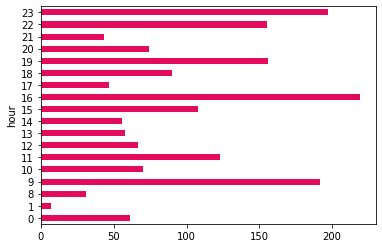

In [28]:
df[df['user']=="Mumma"].groupby(['hour']).size().sort_index().plot(x="hour", kind='barh', color="#E30B5C")

<AxesSubplot:ylabel='hour'>

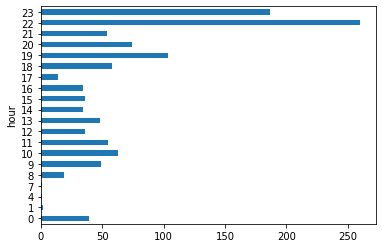

In [29]:
df[df['user']=="Nisha Masi"].groupby(['hour']).size().sort_index().plot(x="hour", kind='barh')

## Is the activity the same on weekdays and weekends? 

In [30]:
df['is_weekend'] = df.Weekday.isin(['Sunday', 'Saturday'])

In [31]:
msgs_per_user = df['user'].value_counts(sort=True)
msgs_per_user

Shanu Bhaiya      1884
Mumma             1754
Sunil Uncle       1312
Nisha Masi        1168
Papa               803
Seema Masi         779
Nani               477
Shreya Didi        334
Nana               302
Prashant Uncle     149
Sony Masi           39
Sana                38
Roshni              19
Name: user, dtype: int64

<AxesSubplot:xlabel='user', ylabel='count'>

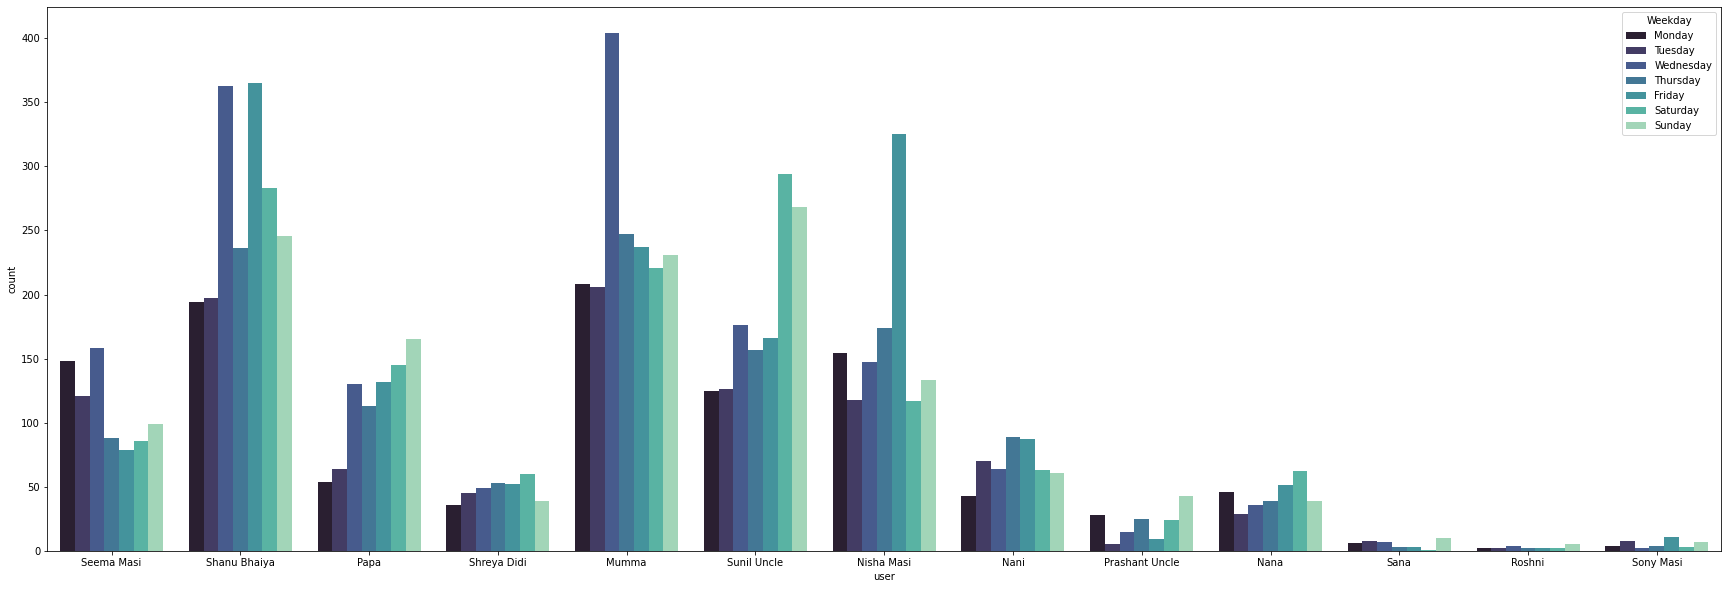

In [32]:
plt.figure(figsize=(30,10))
sns.countplot(x="user", hue="Weekday", data=df, palette="mako")

In [33]:
df.drop(df.index[df['user'] == 'group_notification'], inplace = True)

In [34]:
df.head(2)

,date_time,user,message,date,Year,Day,Month,Time,Weekday,Month Name,hour,is_weekend
4,2020-07-20 20:22:00,Seema Masi,<Media omitted>,2020-07-20,2020,20,7,20:22:00,Monday,July,20,False
5,2020-07-20 20:50:00,Shanu Bhaiya,This message was deleted,2020-07-20,2020,20,7,20:50:00,Monday,July,20,False


<AxesSubplot:xlabel='user', ylabel='count'>

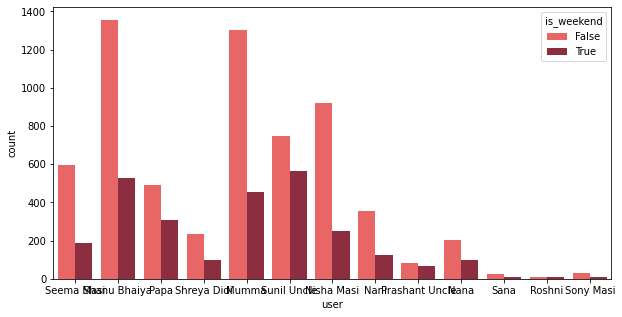

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x="user", hue="is_weekend", data=df, palette=['#FF5050',"#9c1e37"])

In [36]:
def word_count(val):
    return len(val.split())

In [37]:
df['no_of_words'] = df['message'].apply(word_count)

In [38]:
df.tail(2)

,date_time,user,message,date,Year,Day,Month,Time,Weekday,Month Name,hour,is_weekend,no_of_words
9062,2021-08-17 22:11:00,Seema Masi,आज से *काबुली* चने का नाम तालिबानी चना होगा 😁😁,2021-08-17,2021,17,8,22:11:00,Tuesday,August,22,False,10
9063,2021-08-17 23:11:00,Mumma,😥,2021-08-17,2021,17,8,23:11:00,Tuesday,August,23,False,1


In [39]:
total_words_weekday = df[df['is_weekend']==False]['no_of_words'].sum()
total_words_weekday

58313

In [40]:
total_words_weekday/5

11662.6

In [41]:
total_words_weekend = df[df['is_weekend']]['no_of_words'].sum()
total_words_weekend

24000

In [42]:
total_words_weekend/5

4800.0

In [43]:
df.groupby('user')['no_of_words'].sum().sort_values(ascending=False)

user
Mumma             21639
Sunil Uncle       15994
Shanu Bhaiya      12961
Papa              11139
Seema Masi         5980
Nisha Masi         5907
Nani               3568
Nana               2675
Shreya Didi        1168
Prashant Uncle      792
Sony Masi           277
Sana                173
Roshni               40
Name: no_of_words, dtype: int64

In [44]:
wordPerMsg_weekday_vs_weekend = (df.groupby(['user', 'is_weekend'])['no_of_words'].sum()/df.groupby(['user', 'is_weekend']).size())
wordPerMsg_weekday_vs_weekend

user            is_weekend
Mumma           False         13.450845
                True           9.128319
Nana            False          9.019900
                True           8.534653
Nani            False          8.322946
                True           5.080645
Nisha Masi      False          4.617647
                True           6.672000
Papa            False         13.649087
                True          14.225806
Prashant Uncle  False          5.207317
                True           5.447761
Roshni          False          2.416667
                True           1.571429
Sana            False          4.592593
                True           4.454545
Seema Masi      False          8.367003
                True           5.459459
Shanu Bhaiya    False          6.388192
                True           8.137996
Shreya Didi     False          3.417021
                True           3.686869
Sony Masi       False          6.758621
                True           8.100000
Sunil Uncle  

<AxesSubplot:ylabel='user,is_weekend'>

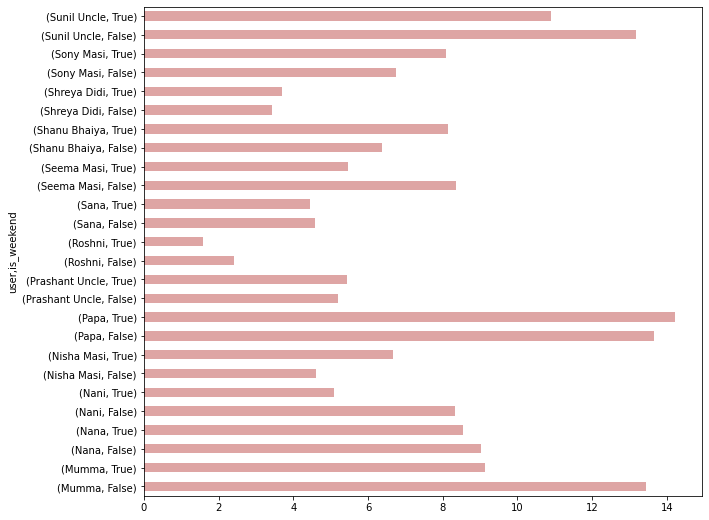

In [45]:
plt.figure(figsize=(10,9))
wordPerMsg_weekday_vs_weekend.plot(kind='barh', color="#dea5a4")

In [46]:
x = df.groupby(['hour', 'Weekday'])['message'].size().reset_index()
x2 = x.pivot("hour", 'Weekday', 'message')
x2.head()

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,45.0,30.0,54.0,32.0,29.0,39.0,28.0
1,7.0,2.0,7.0,3.0,NaN,3.0,NaN
2,3.0,NaN,1.0,6.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN


<AxesSubplot:xlabel='Weekday', ylabel='hour'>

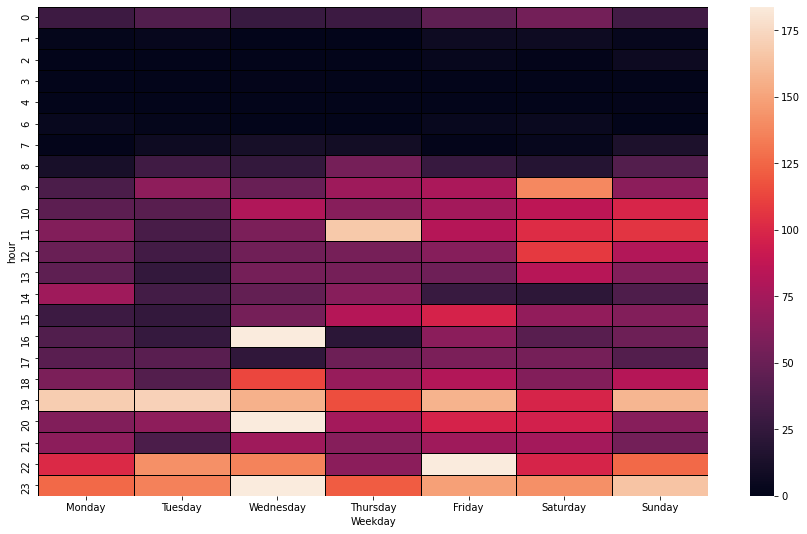

In [47]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize=(15,9))
sns.heatmap(x2[days].fillna(0), robust=True, linecolor="black",linewidths= 0.75)

Text(0, 0.5, 'Month')

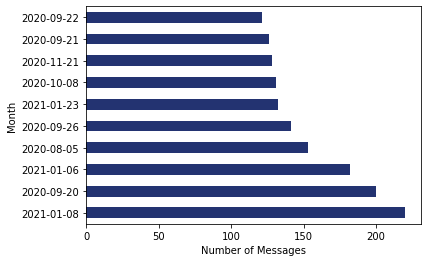

In [48]:
df['date'].value_counts().head(10).plot.barh(color="#233371") # Top 10 Dates on which the most number of messages were sent
plt.xlabel('Number of Messages')
plt.ylabel('Month')

In [49]:
df.head(2)

,date_time,user,message,date,Year,Day,Month,Time,Weekday,Month Name,hour,is_weekend,no_of_words
4,2020-07-20 20:22:00,Seema Masi,<Media omitted>,2020-07-20,2020,20,7,20:22:00,Monday,July,20,False,2
5,2020-07-20 20:50:00,Shanu Bhaiya,This message was deleted,2020-07-20,2020,20,7,20:50:00,Monday,July,20,False,4


<AxesSubplot:ylabel='hour'>

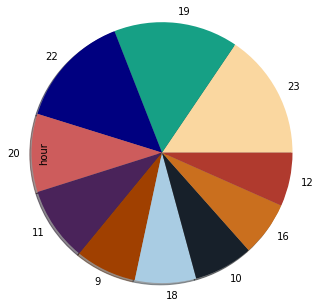

In [50]:
df['hour'].value_counts().head(10).plot.pie(shadow=True,radius=1.5,colors=["#FAD7A0","#16A085","#000080","#CD5C5C","#4A235A","#A04000","#A9CCE3","#17202A","#CA6F1E","#B03A2E"],labeldistance=1.09) 

Text(0, 0.5, 'Authors')

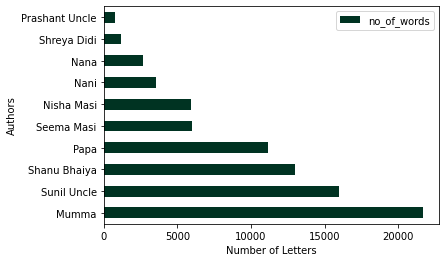

In [51]:
total_letter_count_grouped_by_author = df[['user', 'no_of_words']].groupby('user').sum()
sorted_total_letter_count_grouped_by_author = total_letter_count_grouped_by_author.sort_values('no_of_words', ascending=False)
top_10_sorted_total_letter_count_grouped_by_author = sorted_total_letter_count_grouped_by_author.head(10)
top_10_sorted_total_letter_count_grouped_by_author.plot.barh(color="#003322")
plt.xlabel('Number of Letters')
plt.ylabel('Authors')

In [52]:
mediadf = df[df['message'] == "<Media omitted>"].groupby("user").count().sort_values(by="message",ascending=False).head(10)
print(media_df.head())

NameError: name 'media_df' is not defined

In [ ]:
user_media_messages_value_counts = media_messages_df['user'].value_counts()
top_10_user_media_messages_value_counts = user_media_messages_value_counts.head(10)
top_10_user_media_messages_value_counts.plot.barh()